In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [94]:
data = pd.read_csv('data_set.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [97]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [98]:
len(data['Loan_ID'].unique())

614

In [99]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

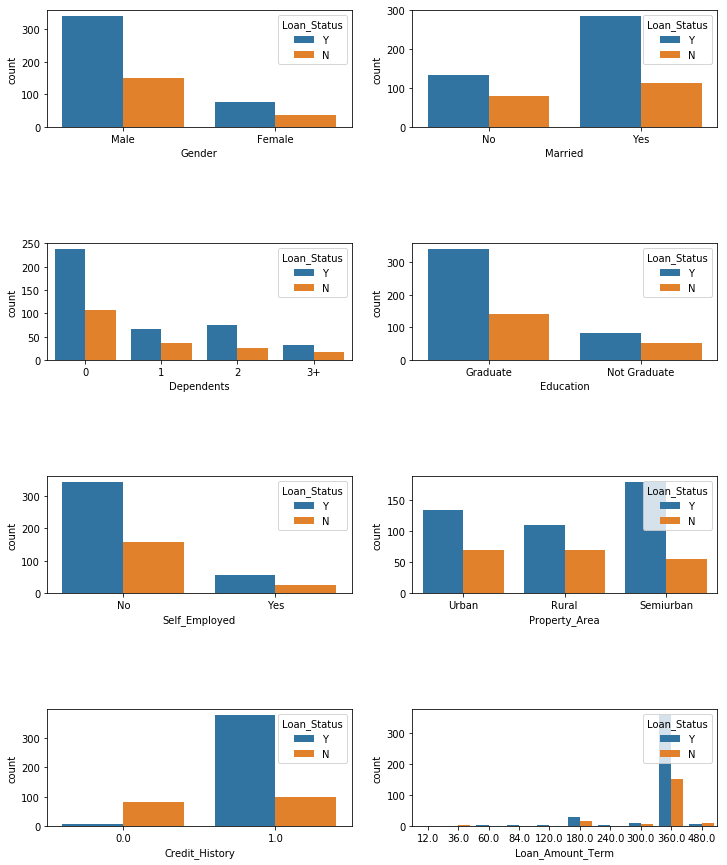

In [101]:
import seaborn as sns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

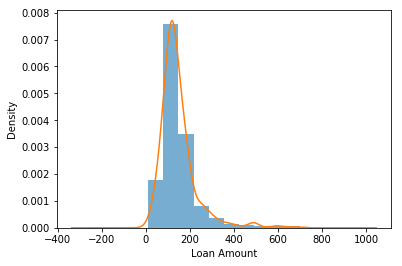

In [102]:
ax = data["LoanAmount"].hist(density=True, stacked=True, alpha=0.6)
data["LoanAmount"].plot(kind='density')
ax.set(xlabel='Loan Amount')
plt.show()

In [103]:
data.drop('Loan_ID', axis=1, inplace=True)

### looking at the graphs, we can make the following changes to the missing values present in the database
For Gender, impute missing values with Male (most common answer)

For Married, impute missing values with yes (most common answer).

For Dependents impute missing values with 0(most common answer).

For SelfEmployed, impute missing values with no(most common answer).

For LoanAmount, impute missing values with mean of data

For Loan Amount Term,impute missing values with 360 (most common answer)

For Credit history, impute missing values with 1.0(most common answer).

In [104]:
data['Gender'].fillna('Male', inplace=True)
data['Married'].fillna('Yes', inplace=True)
data['Dependents'].fillna('0', inplace=True)
data['Self_Employed'].fillna('No', inplace=True)
data['LoanAmount'].fillna(data["LoanAmount"].mean(skipna=True), inplace=True)
data['Loan_Amount_Term'].fillna(360.0, inplace=True)
data['Credit_History'].fillna(1.0, inplace=True)

In [105]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [106]:
gender = {"Female": 0, "Male": 1}
married_employ = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property_replace = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
loanstatus = {'N' : 0,'Y' : 1}

In [107]:
data['Gender'] = data['Gender'].replace(gender)
data['Married'] = data['Married'].replace(married_employ)
data['Dependents'] = data['Dependents'].replace(dependents)
data['Education'] = data['Education'].replace(education)
data['Self_Employed'] = data['Self_Employed'].replace(married_employ)
data['Property_Area'] = data['Property_Area'].replace(property_replace)
data['Loan_Status'] = data['Loan_Status'].replace(loanstatus)

In [108]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.6 KB


In [110]:
data['Loan_Status'].value_counts()
#imbalanced dataset

1    422
0    192
Name: Loan_Status, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

In [112]:
X = data.drop(columns='Loan_Status')
y = data['Loan_Status']

# Splitting into Train -Test Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [113]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(dt,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dt,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6404372570513941
Validation Mean Accuracy:  0.6862156171434521


In [114]:
# The maximum depth of the tree is None,so then nodes are expanded until all leaves are pure
# since it is clearly overfitting, we shall try hyperparameter tuning
# taking depth of decision tree from 1 to 20 and doing graph analysis

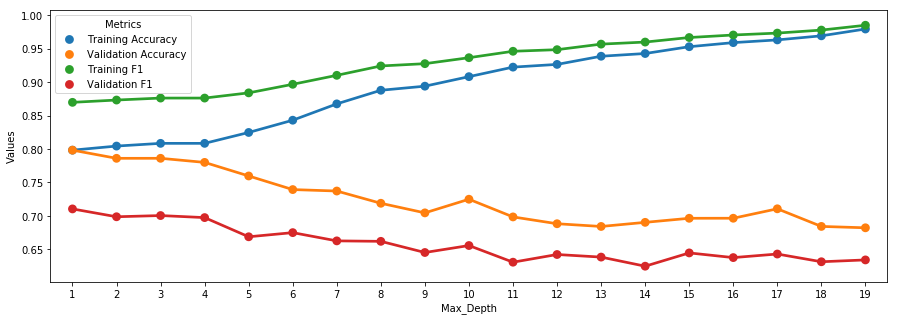

In [115]:

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [116]:
#from above graph, depth seems to be optimimum at 3 or 4
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(dt,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dt,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  0.8085539714867617
Training Data F1 Score  0.8763157894736843
Validation Mean F1 Score:  0.7005155966638158
Validation Mean Accuracy:  0.7861794889777216


In [117]:
#testing on test dataset
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

Test Accuracy:  0.8455284552845529
Test F1 Score:  0.8983957219251337
[[20 18]
 [ 1 84]]


In [118]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(dt,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dt,X_train,y_train,cv=5,scoring='accuracy').mean())


Training Data Set Accuracy:  0.8044806517311609
Training Data F1 Score  0.874015748031496
Validation Mean F1 Score:  0.7005155966638158
Validation Mean Accuracy:  0.7861794889777216


/home/shubhangi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [119]:
#testing on test dataset

y_pred = rf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
[[21 17]
 [ 1 84]]


In [120]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.7967479674796748
Test F1 Score:  0.8603351955307263
[[21 17]
 [ 8 77]]


In [121]:
#same as decision tree, so we will try Logistic Regression to see if it fits better

In [122]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.8536585365853658
Test F1 Score:  0.9021739130434783
[[22 16]
 [ 2 83]]


/home/shubhangi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
#Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier.
#In this analysis we were able to achieve Test Accuracy of 86 %